In [36]:
from sklearn.linear_model import LogisticRegression
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
from matplotlib.colors import ListedColormap

In [2]:
path='/home/carbon13/machine_learning_study_follow_yincheng-master/logist'

In [5]:
data = pd.read_csv(path + '/iris.data',header=None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
4    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [10]:
data[4]=pd.Categorical(data[4]).codes
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [13]:
x,y=np.split(data.values,(4,),axis=1)
x=x[:,:2]
y=y.ravel()
lr_pip = Pipeline([('sc',StandardScaler()),
                  ('poly',PolynomialFeatures(degree=2)),
                  ('lr',LogisticRegression())])

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y)
lr_pip.fit(x_train,y_train)

/home/carbon13/miniconda2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/carbon13/miniconda2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [16]:
y_predict = lr_pip.predict(x_test)

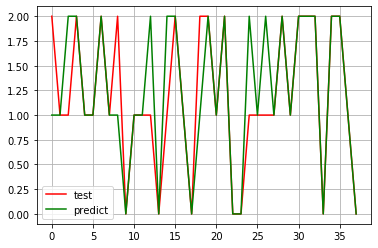

In [17]:
n=np.arange(len(y_test))
plt.plot(n,y_test,'r',label='test')
plt.plot(n,y_predict,'g',label='predict')
plt.legend()
plt.grid()
plt.show()

In [18]:
lr_pip.score(x_test,y_test)

0.7894736842105263

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn_pip = Pipeline([('sc',StandardScaler()),
                  ('poly',PolynomialFeatures(degree=2)),
                  ('KNN',KNeighborsClassifier())])

In [22]:
knn_pip.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('KNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

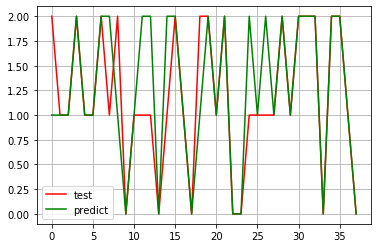

In [23]:
y_knn_predict=knn_pip.predict(x_test)
n=np.arange(len(y_test))
plt.plot(n,y_test,'r',label='test')
plt.plot(n,y_knn_predict,'g',label='predict')
plt.legend()
plt.grid()
plt.show()

In [24]:
knn_pip.score(x_test,y_test)

0.7631578947368421

No handles with labels found to put in legend.


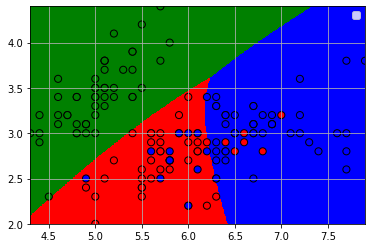

In [41]:
N,M=500,500
x1_min,x1_max=x[:,0].min(),x[:,0].max()
x2_min,x2_max=x[:,1].min(),x[:,1].max()
t1=np.linspace(x1_min,x1_max,N)
t2=np.linspace(x2_min,x2_max,M)
x1,x2=np.meshgrid(t1,t2)
x_test2=np.stack((x1.flat,x2.flat),axis=1)
camp_ligth=ListedColormap(['g','r','b'])
y_predict3=lr_pip.predict(x_test2)
y_predict3=y_predict3.reshape(x1.shape)
plt.pcolormesh(x1,x2,y_predict3,cmap=camp_ligth)
plt.scatter(x[:,0],x[:,1],c=y,edgecolors='k',s=50,cmap=camp_ligth)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.grid()
plt.legend()
plt.show()